METHOD1: USING lxml and requests

In [1]:
import requests, six
import lxml.html as lh
from itertools import cycle, islice
import pandas as pd

In [2]:
url = 'https://www.worldometers.info/coronavirus/'

In [3]:
# create a variable to handle the contents of the website
page = requests.get(url)

In [4]:
# storing the contents of the website under one document variable
doc = lh.fromstring(page.content)

In [5]:
# the rows of a table are stored under the <tr> headers
# parsing the the data between the <tr> .. </tr> of the site
tr_elements = doc.xpath('//tr')

In [6]:
# checking that all the rows of the table have the same number of elements
l = []
for T in tr_elements[:12]:
    l.append(len(T))
    
l

[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]

In [7]:
# thus the first few rows of the html table have the same number of elements
# this ensures that we are collecting the data from the correct portion of the webpage

tr_elements = doc.xpath('//tr')

col = []
i = 0

# for each of the column of the table, we store the first element of the column i.e. col name along with empty list in a tuple.
# We use tuples because they are memory efficient and fast

for t in tr_elements[0]:
    i+=1
    name = t.text_content()
    print('%d : %s'%(i,name))
    # appending the name of the column and an empty list into the main list of all columns.
    col.append((name, []))

1 : Country,Other
2 : TotalCases
3 : NewCases
4 : TotalDeaths
5 : NewDeaths
6 : TotalRecovered
7 : ActiveCases
8 : Serious,Critical
9 : Tot Cases/1M pop
10 : Deaths/1M pop
11 : TotalTests
12 : Tests/
1M pop

13 : Continent


In [8]:
type(tr_elements[3])

lxml.html.HtmlElement

In [9]:
# filling the empty lists with the elements of the columns so that we have the complete html table.

for j in range(1, len(tr_elements)):
    T = tr_elements[j]
    # if the row is not of size 13 then the data is not from the desired html table
    if len(T) != 13:
        break
    # i is the index of our column
    i = 0
    # iterating through each of the elements of the row
    for t in T.iterchildren():
        data = t.text_content()
        # checking if the row is empty.....................DID NOT UNDERSTAND THE NEXT LINE..............
        if i>0:
            try:
                data = float(data)
            except:
                pass
        # appending the data into the empty list of the respective column
        col[i][1].append(data)    # using 1 as the column number because we ar dealing with a tuple
        # going to the next column
        i += 1        

In [10]:
# Checking the length of each column... ideally they should all be the same
[len(C) for (title,C) in col]

[457, 457, 457, 457, 457, 457, 457, 457, 457, 457, 457, 457, 457]

In [11]:
# Great all columns have the same number of elements.. thus we can say we have imported the html table saafely

# we can conver this list of tuples into a dictionary which we can inturn convert to a dataframe using pandas
Dict = {title:column for (title, column) in col}
df = pd.DataFrame(Dict)

In [12]:
df.head(30)

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Continent
0,\nNorth America\n,"881,249","+1,382","48,613",177,"100,507","732,129","15,268",,,,,North America
1,\nEurope\n,"1,153,207","+13,156","108,750",844,"354,745","689,712","26,023",,,,,Europe
2,\nAsia\n,"415,155","+4,895","15,665",156,"195,644","203,846","6,228",,,,,Asia
3,\nSouth America\n,"91,789",529,"4,344",32,"39,780","47,665","9,472",,,,,South America
4,\nOceania\n,"8,201",11,88,4,"6,016","2,097",51,,,,,Australia/Oceania
5,\nAfrica\n,"25,777",366,"1,202",5,"6,806","17,769",167,,,,,Africa
6,\n\n,721,,15,,644,62,7,,,,,
7,World,"2,576,099","+20,339","178,677","+1,218","704,142","1,693,280","57,216",330,22.9,,,All
8,USA,"819,175",431,"45,343",25,"82,973","690,859","14,016","2,475",137,"4,190,002","12,659",North America
9,Spain,"208,389","+4,211","21,717",435,"85,915","100,757","7,705","4,457",464,"930,230","19,896",Europe


In [13]:
df.tail(20)

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Continent
437,Papua New Guinea,7,,,,,7,,0.8,,604,68,Australia/Oceania
438,Bhutan,6,1,,,2,4,,8,,"8,765","11,359",Asia
439,St. Barth,6,,,,6,0,,607,,,,North America
440,Western Sahara,6,,,,,6,,10,,,,Africa
441,British Virgin Islands,5,,1,,3,1,,165,33,,,North America
442,Burundi,5,,1,,4,0,,0.4,0.08,80,7,Africa
443,Caribbean Netherlands,5,,,,,5,,191,,110,"4,195",North America
444,Sao Tome and Principe,4,,,,,4,,18,,19,87,Africa
445,South Sudan,4,,,,,4,,0.4,,,,Africa
446,Anguilla,3,,,,1,2,,200,,,,North America


In [14]:
df = df[7:906]

In [15]:
df

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Continent
7,World,"2,576,099","+20,339","178,677","+1,218","704,142","1,693,280","57,216",330,22.9,,,All
8,USA,"819,175",431,"45,343",25,"82,973","690,859","14,016","2,475",137,"4,190,002","12,659",North America
9,Spain,"208,389","+4,211","21,717",435,"85,915","100,757","7,705","4,457",464,"930,230","19,896",Europe
10,Italy,"183,957",,"24,648",,"51,600","107,709","2,471","3,043",408,"1,450,150","23,985",Europe
11,France,"158,050",,"20,796",,"39,181","98,073","5,433","2,421",319,"463,662","7,103",Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,Total:,"91,260","+4,774","4,312",233,"39,757","47,191","9,472",,,,,South America
453,Total:,"8,190",26,84,1,"5,751","2,355",54,,,,,Australia/Oceania
454,Total:,"25,411","+1,240","1,197",33,"6,770","17,444",164,,,,,Africa
455,Total:,721,,15,,644,62,7,,,,,


In [16]:
df.reset_index(inplace = True)

In [17]:
df.columns

Index(['index', 'Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths',
       'NewDeaths', 'TotalRecovered', 'ActiveCases', 'Serious,Critical',
       'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/\n1M pop\n',
       'Continent'],
      dtype='object')

In [18]:
del df['index']

In [19]:
df

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Continent
0,World,"2,576,099","+20,339","178,677","+1,218","704,142","1,693,280","57,216",330,22.9,,,All
1,USA,"819,175",431,"45,343",25,"82,973","690,859","14,016","2,475",137,"4,190,002","12,659",North America
2,Spain,"208,389","+4,211","21,717",435,"85,915","100,757","7,705","4,457",464,"930,230","19,896",Europe
3,Italy,"183,957",,"24,648",,"51,600","107,709","2,471","3,043",408,"1,450,150","23,985",Europe
4,France,"158,050",,"20,796",,"39,181","98,073","5,433","2,421",319,"463,662","7,103",Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,Total:,"91,260","+4,774","4,312",233,"39,757","47,191","9,472",,,,,South America
446,Total:,"8,190",26,84,1,"5,751","2,355",54,,,,,Australia/Oceania
447,Total:,"25,411","+1,240","1,197",33,"6,770","17,444",164,,,,,Africa
448,Total:,721,,15,,644,62,7,,,,,


-----

METHOD2: DIRECTLY importing HTML tables as data frames using pandas

In [20]:
import pandas as pd
import requests

url = 'https://www.worldometers.info/coronavirus/'

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

r = requests.get(url, headers=header)
# remember that this returns a list of dataframes
df = pd.read_html(r.text)

In [21]:
df

[             Country,Other  TotalCases NewCases  TotalDeaths NewDeaths  \
 0                    World     2576099  +20,339     178677.0    +1,218   
 1                      USA      819175     +431      45343.0       +25   
 2                    Spain      208389   +4,211      21717.0      +435   
 3                    Italy      183957      NaN      24648.0       NaN   
 4                   France      158050      NaN      20796.0       NaN   
 ..                     ...         ...      ...          ...       ...   
 209               Anguilla           3      NaN          NaN       NaN   
 210  Saint Pierre Miquelon           1      NaN          NaN       NaN   
 211                  Yemen           1      NaN          NaN       NaN   
 212                  China       82788      +30       4632.0       NaN   
 213                 Total:     2576099  +20,339     178677.0    +1,218   
 
      TotalRecovered  ActiveCases  Serious,Critical  Tot Cases/1M pop  \
 0          704142.0     

In [22]:
# 214 rows x 12 columns

In [23]:
dfs = df[0]

In [24]:
dfs.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/ 1M pop
0,World,2576099,"+20,339",178677.0,"+1,218",704142.0,1693280,57216.0,330.0,22.9,NaN,NaN
1,USA,819175,+431,45343.0,+25,82973.0,690859,14016.0,2475.0,137.0,4190002.0,12659.0
2,Spain,208389,"+4,211",21717.0,+435,85915.0,100757,7705.0,4457.0,464.0,930230.0,19896.0
3,Italy,183957,NaN,24648.0,NaN,51600.0,107709,2471.0,3043.0,408.0,1450150.0,23985.0
4,France,158050,NaN,20796.0,NaN,39181.0,98073,5433.0,2421.0,319.0,463662.0,7103.0


------

METHOD 3: Webscraping HTML using BeautifulSoup Library

In [25]:
from bs4 import BeautifulSoup
import csv
from urllib.request import Request, urlopen

In [26]:
url_page = 'https://www.worldometers.info/coronavirus/'

In [27]:
# Now we query the page and return the html to the page varible

#..  page = urllib.request.urlopen(url_page)
# now if we straightaway run the above command we will get a 403 error
# because we did not disguise our request and the website is secure enough to 
# avoid our request thinking it was a bot.

try:
    page = urllib.request.urlopen(url)
except:
    print("An error occured.")

An error occured.


In [28]:
req = Request(url_page, headers = {'User-Agent':'Mozilla/5.0'})
page = urlopen(req).read()
soup = BeautifulSoup(page, 'lxml')

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--><html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Coronavirus Update (Live): 2,576,099 Cases and 178,677 Deaths from COVID-19 Virus Pandemic - Worldometer</title>
<meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/app
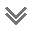

In [29]:
print(soup)

In [30]:
table = soup.find('table')

In [31]:
table_th = table.find_all('th')
headers = [i.text for i in table_th]
print(headers)
print(len(headers))

['Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'ActiveCases', 'Serious,Critical', 'Tot\xa0Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/\n1M pop\n', 'Continent']
13


In [32]:
table_rows = table.find_all('tr')

In [33]:
# checking that the length of the rows is same for all the extracted rows
list = []
for row in table_rows[:10]:
    list.append(len(row))

list

[27, 27, 27, 27, 27, 27, 27, 27, 27, 27]

In [34]:
rows = []
for row in table_rows:
    table_data = row.find_all('td')
    row_data = [i.text for i in table_data]
    rows.append(row_data)
    print(row_data)
    print(len(row_data))

[]
0
['\nNorth America\n', '881,249', '+1,382', '48,613', '+177', '100,507', '732,129', '15,268', '', '', '', '', 'North America']
13
['\nEurope\n', '1,153,207', '+13,156', '108,750', '+844', '354,745', '689,712', '26,023', '', '', '', '', 'Europe']
13
['\nAsia\n', '415,193', '+4,933', '15,665', '+156', '195,686', '203,842', '6,228', '', '', '', '', 'Asia']
13
['\nSouth America\n', '91,789', '+529', '4,344', '+32', '39,780', '47,665', '9,472', '', '', '', '', 'South America']
13
['\nOceania\n', '8,201', '+11', '88', '+4', '6,016', '2,097', '51', '', '', '', '', 'Australia/Oceania']
13
['\nAfrica\n', '25,777', '+366', '1,202', '+5', '6,806', '17,769', '167', '', '', '', '', 'Africa']
13
['\n\n', '721', '', '15', '', '644', '62', '7', '', '', '', '', '']
13
['World', '2,576,137', '+20,377', '178,677', '+1,218', '704,184', '1,693,276', '57,216', '330', '22.9', '', '', 'All']
13
['USA', '819,175', '+431', '45,343 ', '+25', '82,973', '690,859', '14,016', '2,475', '137', '4,190,002', '12,659

In [35]:
import pandas as pd
df = pd.DataFrame(rows)

In [36]:
df.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,None,None,None,None,None,None,None,None,None,None,None,None,None
1,\nNorth America\n,"881,249","+1,382","48,613",+177,"100,507","732,129","15,268",,,,,North America
2,\nEurope\n,"1,153,207","+13,156","108,750",+844,"354,745","689,712","26,023",,,,,Europe
3,\nAsia\n,"415,193","+4,933","15,665",+156,"195,686","203,842","6,228",,,,,Asia
4,\nSouth America\n,"91,789",+529,"4,344",+32,"39,780","47,665","9,472",,,,,South America
5,\nOceania\n,"8,201",+11,88,+4,"6,016","2,097",51,,,,,Australia/Oceania
6,\nAfrica\n,"25,777",+366,"1,202",+5,"6,806","17,769",167,,,,,Africa
7,\n\n,721,,15,,644,62,7,,,,,
8,World,"2,576,137","+20,377","178,677","+1,218","704,184","1,693,276","57,216",330,22.9,,,All
9,USA,"819,175",+431,"45,343",+25,"82,973","690,859","14,016","2,475",137,"4,190,002","12,659",North America


In [37]:
df = df[8:]
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
8,World,"2,576,137","+20,377","178,677","+1,218","704,184","1,693,276","57,216",330,22.9,,,All
9,USA,"819,175",+431,"45,343",+25,"82,973","690,859","14,016","2,475",137,"4,190,002","12,659",North America
10,Spain,"208,389","+4,211","21,717",+435,"85,915","100,757","7,705","4,457",464,"930,230","19,896",Europe
11,Italy,"183,957",,"24,648",,"51,600","107,709","2,471","3,043",408,"1,450,150","23,985",Europe
12,France,"158,050",,"20,796",,"39,181","98,073","5,433","2,421",319,"463,662","7,103",Europe
13,Germany,"148,704",+251,"5,100",+14,"99,400","44,204","2,908","1,775",61,"1,728,357","20,629",Europe
14,UK,"129,044",,"17,337",,N/A,"111,363","1,559","1,901",255,"535,342","7,886",Europe
15,Turkey,"95,591",,"2,259",,"14,918","78,414","1,865","1,133",27,"713,409","8,459",Asia
16,Iran,"85,996","+1,194","5,391",+94,"63,113","17,492","3,311","1,024",64,"377,396","4,493",Asia
17,Russia,"57,999","+5,236",513,+57,"4,420","53,066",700,397,4,"2,250,000","15,418",Europe


In [38]:
df.reset_index(inplace = True)

In [39]:
del df['index']

In [40]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,World,"2,576,137","+20,377","178,677","+1,218","704,184","1,693,276","57,216",330,22.9,,,All
1,USA,"819,175",+431,"45,343",+25,"82,973","690,859","14,016","2,475",137,"4,190,002","12,659",North America
2,Spain,"208,389","+4,211","21,717",+435,"85,915","100,757","7,705","4,457",464,"930,230","19,896",Europe
3,Italy,"183,957",,"24,648",,"51,600","107,709","2,471","3,043",408,"1,450,150","23,985",Europe
4,France,"158,050",,"20,796",,"39,181","98,073","5,433","2,421",319,"463,662","7,103",Europe
5,Germany,"148,704",+251,"5,100",+14,"99,400","44,204","2,908","1,775",61,"1,728,357","20,629",Europe
6,UK,"129,044",,"17,337",,N/A,"111,363","1,559","1,901",255,"535,342","7,886",Europe
7,Turkey,"95,591",,"2,259",,"14,918","78,414","1,865","1,133",27,"713,409","8,459",Asia
8,Iran,"85,996","+1,194","5,391",+94,"63,113","17,492","3,311","1,024",64,"377,396","4,493",Asia
9,Russia,"57,999","+5,236",513,+57,"4,420","53,066",700,397,4,"2,250,000","15,418",Europe


In [41]:
df.columns = headers

In [42]:
df.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Continent
0,World,"2,576,137","+20,377","178,677","+1,218","704,184","1,693,276","57,216",330,22.9,,,All
1,USA,"819,175",+431,"45,343",+25,"82,973","690,859","14,016","2,475",137,"4,190,002","12,659",North America
2,Spain,"208,389","+4,211","21,717",+435,"85,915","100,757","7,705","4,457",464,"930,230","19,896",Europe
3,Italy,"183,957",,"24,648",,"51,600","107,709","2,471","3,043",408,"1,450,150","23,985",Europe
4,France,"158,050",,"20,796",,"39,181","98,073","5,433","2,421",319,"463,662","7,103",Europe


-----

METHOD 4: Webscraping HTML using Scrapy

-----

METHOD 5: Webscraping HTML using selenium